## 1. Import Libraries

In [21]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Utilities
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [22]:
# Load the dataset
df = pd.read_csv('../data/s11.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of matches: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nFirst rows:")
df.head()

Dataset shape: (2901, 14)
Number of matches: 2901
Number of features: 14

First rows:


,result,server,team_1__001,team_1__002,team_1__003,team_1__004,team_1__005,team_2__001,team_2__002,team_2__003,team_2__004,team_2__005,timestamp,game_length
0,Defeat,eune,Irelia,Elise,Fizz,Draven,Morgana,Kayle,Rek'Sai,Yasuo,Ezreal,Thresh,2020-11-07 05:46:02,18m 0s
1,Victory,na,Gragas,Taliyah,Yone,Miss Fortune,Leona,Ornn,Kindred,Akali,Seraphine,Thresh,2020-12-31 08:45:22,30m 44s
2,Defeat,na,Volibear,Graves,Lulu,Lucian,Nami,Jax,Taliyah,Katarina,Kai'Sa,Sett,2020-12-31 07:12:07,30m 44s
3,Victory,na,Gragas,Sejuani,Yone,Samira,Leona,Sylas,Olaf,Anivia,Lucian,Galio,2020-12-31 06:12:52,30m 44s
4,Victory,na,Katarina,Kindred,Sylas,Yone,Galio,Gragas,Graves,Malphite,Samira,Thresh,2020-12-31 05:12:43,30m 44s


## 3. Dataset Overview

In [23]:
# Dataset information
print("=== Dataset Information ===")
df.info()

print("\n=== Column Names ===")
print(df.columns.tolist())

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   result       2901 non-null   object
 1   server       2901 non-null   object
 2   team_1__001  2901 non-null   object
 3   team_1__002  2901 non-null   object
 4   team_1__003  2901 non-null   object
 5   team_1__004  2901 non-null   object
 6   team_1__005  2901 non-null   object
 7   team_2__001  2901 non-null   object
 8   team_2__002  2901 non-null   object
 9   team_2__003  2901 non-null   object
 10  team_2__004  2901 non-null   object
 11  team_2__005  2901 non-null   object
 12  timestamp    2901 non-null   object
 13  game_length  2901 non-null   object
dtypes: object(14)
memory usage: 317.4+ KB

=== Column Names ===
['result', 'server', 'team_1__001', 'team_1__002', 'team_1__003', 'team_1__004', 'team_1__005', 'team_2__001', 'team_2__002', 'team_2__003', 'te

In [24]:
# Check for missing values
print("=== Missing Values ===")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
    print(f"\nTotal missing values: {missing.sum()}")
    print(f"Percentage: {(missing.sum() / (len(df) * len(df.columns)) * 100):.2f}%")
else:
    print("No missing values found!")

=== Missing Values ===
No missing values found!


In [25]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates / len(df) * 100):.2f}%")

Number of duplicate rows: 45
Percentage of duplicates: 1.55%


In [26]:
# Basic statistics
print("=== Descriptive Statistics ===")
df.describe(include='all')

=== Descriptive Statistics ===


,result,server,team_1__001,team_1__002,team_1__003,team_1__004,team_1__005,team_2__001,team_2__002,team_2__003,team_2__004,team_2__005,timestamp,game_length
count,2901,2901,2901,2901,2901,2901,2901,2901,2901,2901,2901,2901,2901,2901
unique,2,4,96,62,102,70,56,95,58,102,72,63,2244,235
top,Defeat,www,Camille,Graves,Akali,Jhin,Leona,Camille,Graves,Yone,Kai'Sa,Leona,2020-12-31 03:12:33,30m 18s
freq,2271,1592,305,581,235,590,355,266,504,226,568,381,8,100


## 5. Server Distribution

=== Server Distribution ===
server
www     1592
euw      625
na       501
eune     183
Name: count, dtype: int64

Number of unique servers: 4


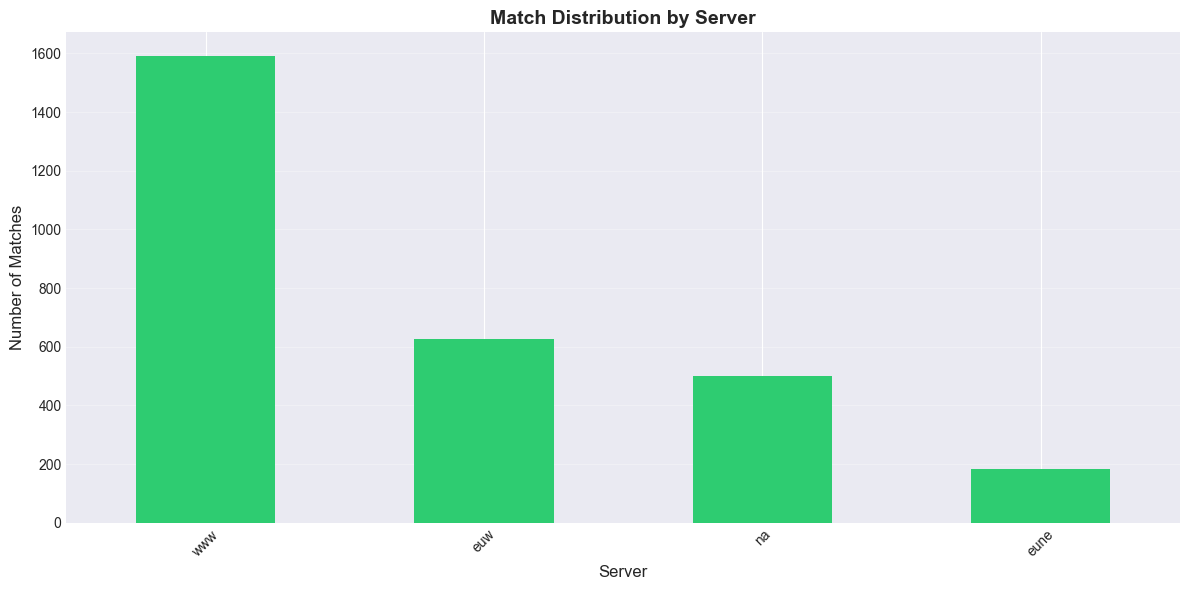

In [28]:
# Analyze server distribution
print("=== Server Distribution ===")
server_counts = df['server'].value_counts()
print(server_counts)
print(f"\nNumber of unique servers: {df['server'].nunique()}")

# Visualize
plt.figure(figsize=(12, 6))
server_counts.plot(kind='bar', color='#2ecc71')
plt.title('Match Distribution by Server', fontsize=14, fontweight='bold')
plt.xlabel('Server', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Champion Analysis

In [29]:
# Extract all champion columns
team1_cols = [col for col in df.columns if col.startswith('team_1__')]
team2_cols = [col for col in df.columns if col.startswith('team_2__')]
all_champion_cols = team1_cols + team2_cols

print(f"Team 1 champion columns: {team1_cols}")
print(f"Team 2 champion columns: {team2_cols}")
print(f"\nTotal champion slots per match: {len(all_champion_cols)}")

Team 1 champion columns: ['team_1__001', 'team_1__002', 'team_1__003', 'team_1__004', 'team_1__005']
Team 2 champion columns: ['team_2__001', 'team_2__002', 'team_2__003', 'team_2__004', 'team_2__005']

Total champion slots per match: 10


In [30]:
# Get all champions from all matches
all_champions = []
for col in all_champion_cols:
    all_champions.extend(df[col].dropna().tolist())

# Count champion picks
champion_counts = Counter(all_champions)
champion_df = pd.DataFrame.from_dict(champion_counts, orient='index', columns=['Pick_Count'])
champion_df = champion_df.sort_values('Pick_Count', ascending=False)

print(f"=== Champion Statistics ===")
print(f"Total number of unique champions: {len(champion_counts)}")
print(f"Total champion picks across all matches: {len(all_champions)}")
print(f"Expected picks: {len(df) * 10}")

print(f"\n=== Top 20 Most Picked Champions ===")
print(champion_df.head(20))

=== Champion Statistics ===
Total number of unique champions: 153
Total champion picks across all matches: 29010
Expected picks: 29010

=== Top 20 Most Picked Champions ===
              Pick_Count
Jhin                1144
Graves              1104
Kai'Sa              1102
Lucian               846
Leona                739
Akali                703
Camille              680
Alistar              670
Gragas               645
Pantheon             612
Taliyah              608
Sett                 604
Miss Fortune         600
Ezreal               567
Lillia               556
Thresh               540
Samira               524
Yone                 517
Sylas                462
Aatrox               458


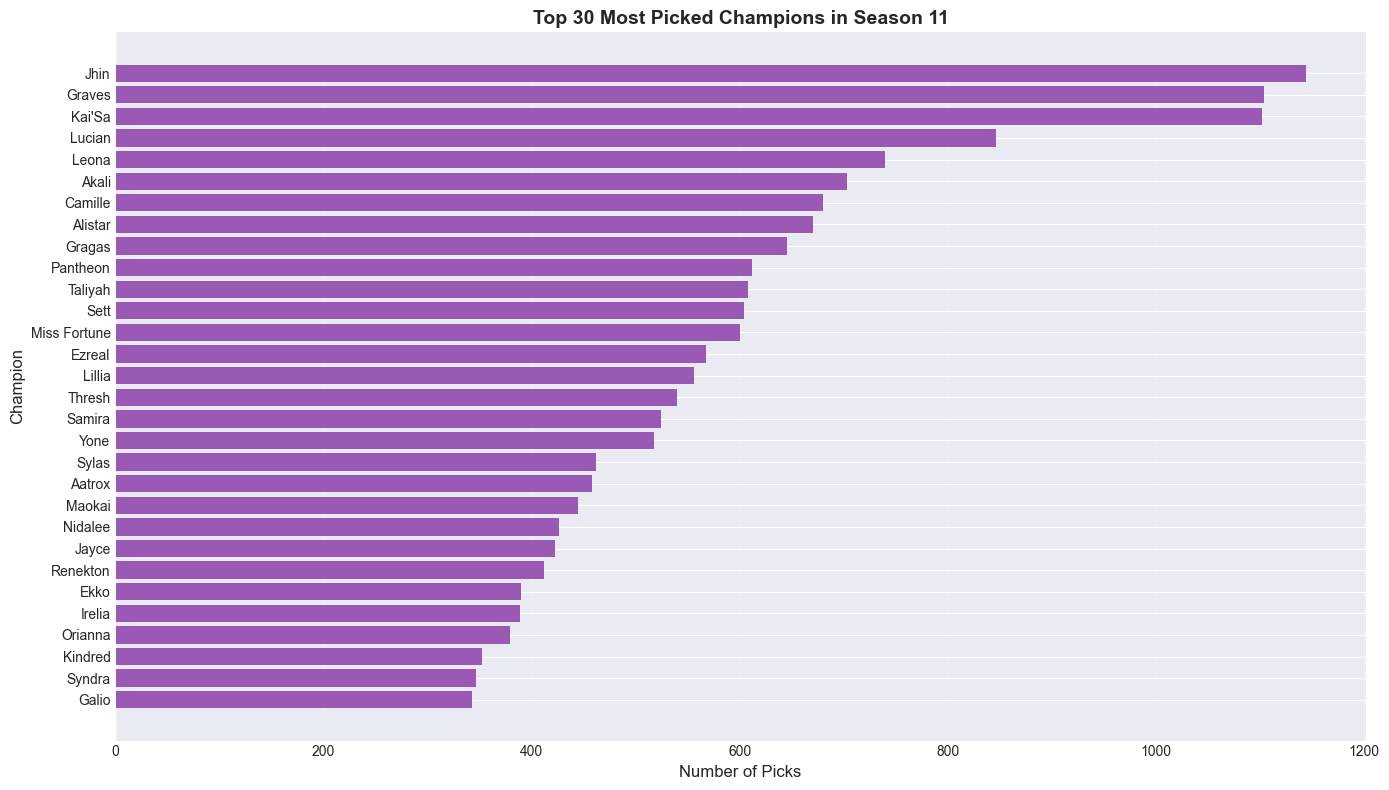

In [31]:
# Visualize top 30 most picked champions
plt.figure(figsize=(14, 8))
top_30 = champion_df.head(30)
plt.barh(range(len(top_30)), top_30['Pick_Count'].values, color='#9b59b6')
plt.yticks(range(len(top_30)), top_30.index)
plt.xlabel('Number of Picks', fontsize=12)
plt.ylabel('Champion', fontsize=12)
plt.title('Top 30 Most Picked Champions in Season 11', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

=== Pick Rate Statistics ===
Mean pick rate: 0.65%
Median pick rate: 0.31%
Max pick rate: 3.94% (Jhin)
Min pick rate: 0.01% (Yorick)


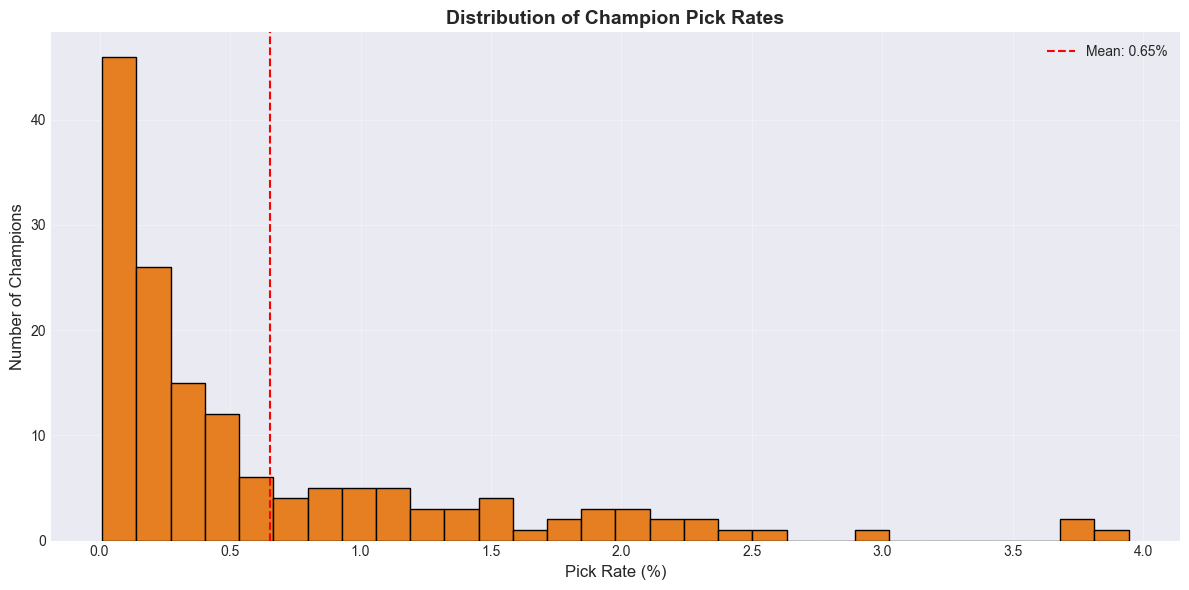

In [32]:
# Pick rate analysis
total_picks = len(all_champions)
champion_df['Pick_Rate_%'] = (champion_df['Pick_Count'] / total_picks) * 100

print("=== Pick Rate Statistics ===")
print(f"Mean pick rate: {champion_df['Pick_Rate_%'].mean():.2f}%")
print(f"Median pick rate: {champion_df['Pick_Rate_%'].median():.2f}%")
print(f"Max pick rate: {champion_df['Pick_Rate_%'].max():.2f}% ({champion_df['Pick_Rate_%'].idxmax()})")
print(f"Min pick rate: {champion_df['Pick_Rate_%'].min():.2f}% ({champion_df['Pick_Rate_%'].idxmin()})")

# Distribution of pick rates
plt.figure(figsize=(12, 6))
plt.hist(champion_df['Pick_Rate_%'], bins=30, color='#e67e22', edgecolor='black')
plt.xlabel('Pick Rate (%)', fontsize=12)
plt.ylabel('Number of Champions', fontsize=12)
plt.title('Distribution of Champion Pick Rates', fontsize=14, fontweight='bold')
plt.axvline(champion_df['Pick_Rate_%'].mean(), color='red', linestyle='--', 
            label=f'Mean: {champion_df["Pick_Rate_%"].mean():.2f}%')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Win Rate Analysis

In [33]:
# Calculate win rates for each champion
# For team 1
team1_champions = df[team1_cols].values.flatten()
team1_results = np.repeat(df['result'].values, len(team1_cols))

# Create DataFrame for team 1
team1_data = pd.DataFrame({
    'Champion': team1_champions,
    'Result': team1_results
})

# For team 2 (invert results)
team2_champions = df[team2_cols].values.flatten()
team2_results = np.repeat(df['result'].values, len(team2_cols))
# Invert results for team 2
team2_results = np.where(team2_results == 'Victory', 'Defeat', 'Victory')

# Create DataFrame for team 2
team2_data = pd.DataFrame({
    'Champion': team2_champions,
    'Result': team2_results
})

# Combine both teams
all_champion_data = pd.concat([team1_data, team2_data], ignore_index=True)
all_champion_data = all_champion_data.dropna()

print("Champion-result data created successfully!")
print(f"Total champion-match pairs: {len(all_champion_data)}")

Champion-result data created successfully!
Total champion-match pairs: 29010


In [34]:
# Calculate win rates
champion_wins = all_champion_data[all_champion_data['Result'] == 'Victory'].groupby('Champion').size()
champion_total = all_champion_data.groupby('Champion').size()
champion_winrate = (champion_wins / champion_total * 100).sort_values(ascending=False)

# Create comprehensive champion statistics
champion_stats = pd.DataFrame({
    'Total_Games': champion_total,
    'Wins': champion_wins.fillna(0).astype(int),
    'Win_Rate_%': champion_winrate.fillna(0)
})

# Filter champions with at least 10 games for reliable statistics
champion_stats_filtered = champion_stats[champion_stats['Total_Games'] >= 10].copy()

print("=== Win Rate Statistics (Champions with 10+ games) ===")
print(f"Number of champions with 10+ games: {len(champion_stats_filtered)}")
print(f"\nMean win rate: {champion_stats_filtered['Win_Rate_%'].mean():.2f}%")
print(f"Median win rate: {champion_stats_filtered['Win_Rate_%'].median():.2f}%")
print(f"\nTop 10 Highest Win Rates:")
print(champion_stats_filtered.nlargest(10, 'Win_Rate_%'))
print(f"\nTop 10 Lowest Win Rates:")
print(champion_stats_filtered.nsmallest(10, 'Win_Rate_%'))

=== Win Rate Statistics (Champions with 10+ games) ===
Number of champions with 10+ games: 146

Mean win rate: 50.63%
Median win rate: 50.00%

Top 10 Highest Win Rates:
              Total_Games  Wins  Win_Rate_%
Champion                                   
Aurelion Sol           16    12   75.000000
Xin Zhao               15    11   73.333333
Sona                   38    27   71.052632
Tryndamere             41    28   68.292683
Zyra                   12     8   66.666667
Kayle                  63    41   65.079365
Malzahar               14     9   64.285714
Rek'Sai               108    69   63.888889
Sivir                  11     7   63.636364
Swain                  58    36   62.068966

Top 10 Lowest Win Rates:
            Total_Games  Wins  Win_Rate_%
Champion                                 
Corki                10     3   30.000000
Amumu                23     7   30.434783
Shyvana              23     7   30.434783
Zac                  35    12   34.285714
Udyr                 28  

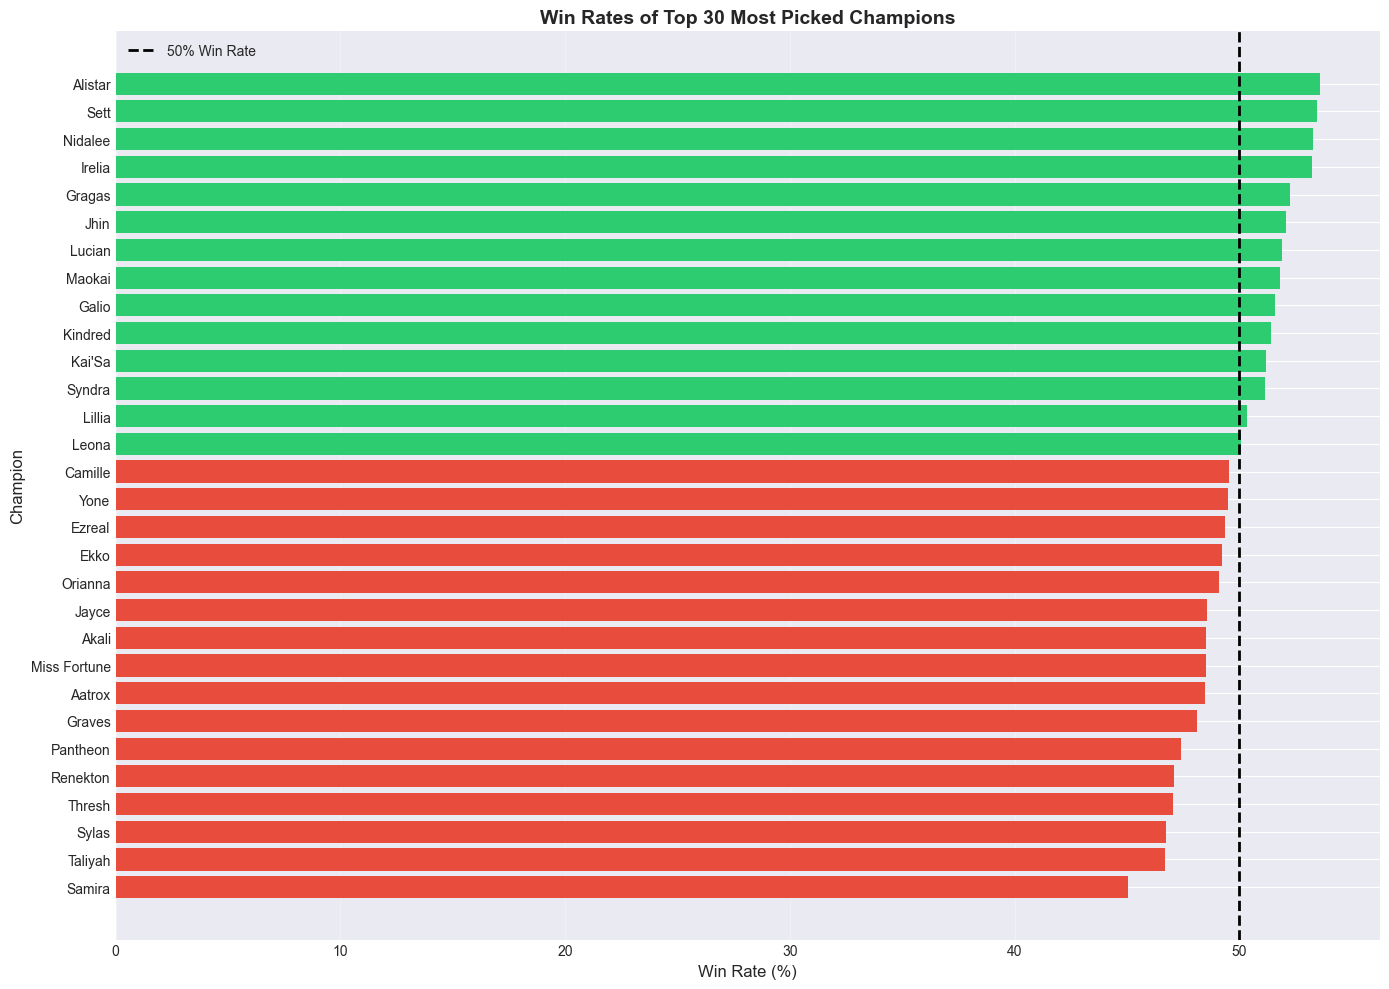

In [35]:
# Visualize win rates for top picked champions
top_picked = champion_df.head(30).index
top_picked_stats = champion_stats_filtered.loc[champion_stats_filtered.index.isin(top_picked)]
top_picked_stats = top_picked_stats.sort_values('Win_Rate_%', ascending=True)

plt.figure(figsize=(14, 10))
colors = ['#e74c3c' if wr < 50 else '#2ecc71' for wr in top_picked_stats['Win_Rate_%']]
plt.barh(range(len(top_picked_stats)), top_picked_stats['Win_Rate_%'].values, color=colors)
plt.yticks(range(len(top_picked_stats)), top_picked_stats.index)
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('Champion', fontsize=12)
plt.title('Win Rates of Top 30 Most Picked Champions', fontsize=14, fontweight='bold')
plt.axvline(x=50, color='black', linestyle='--', linewidth=2, label='50% Win Rate')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Temporal Analysis

In [36]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date features
df['date'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.month
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

print("=== Temporal Statistics ===")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

=== Temporal Statistics ===
Date range: 2020-10-25 02:07:41 to 2020-12-31 08:56:39
Duration: 67 days


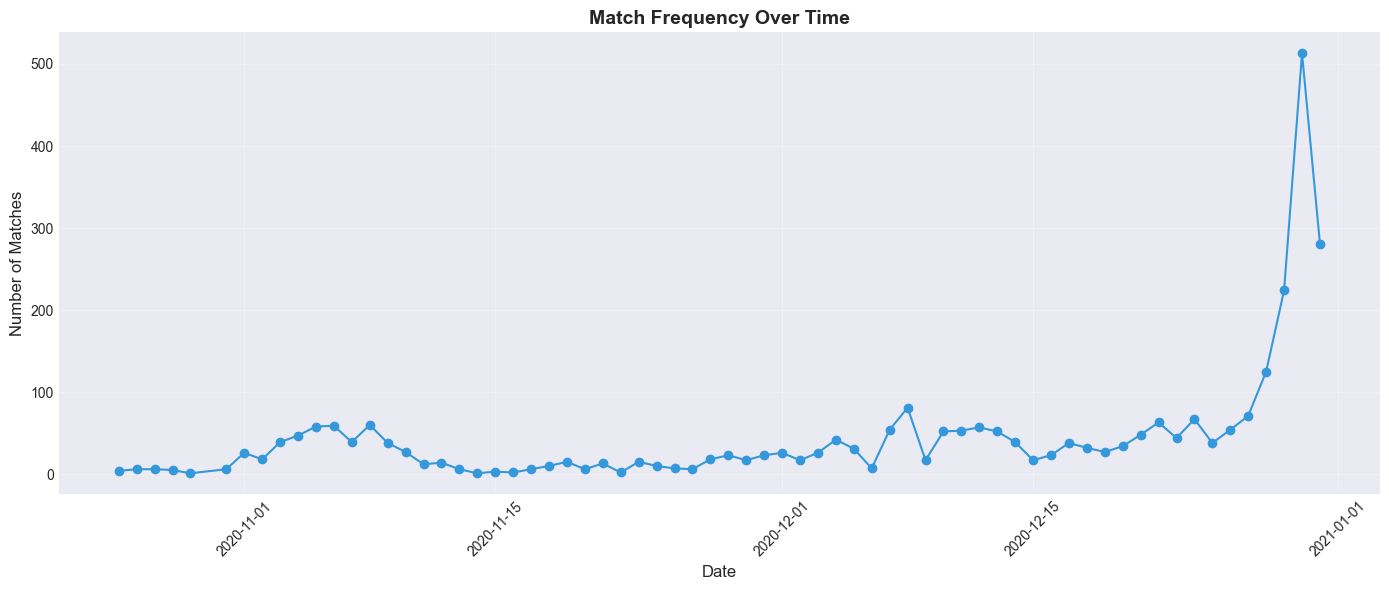

In [37]:
# Matches over time
matches_per_day = df.groupby('date').size()

plt.figure(figsize=(14, 6))
plt.plot(matches_per_day.index, matches_per_day.values, marker='o', linestyle='-', color='#3498db')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Match Frequency Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Game Length Analysis

=== Game Length Statistics ===
count    2901.000000
mean       25.123153
std         7.146428
min         8.250000
25%        20.050000
50%        25.416667
75%        30.300000
max        49.100000
Name: game_length_minutes, dtype: float64


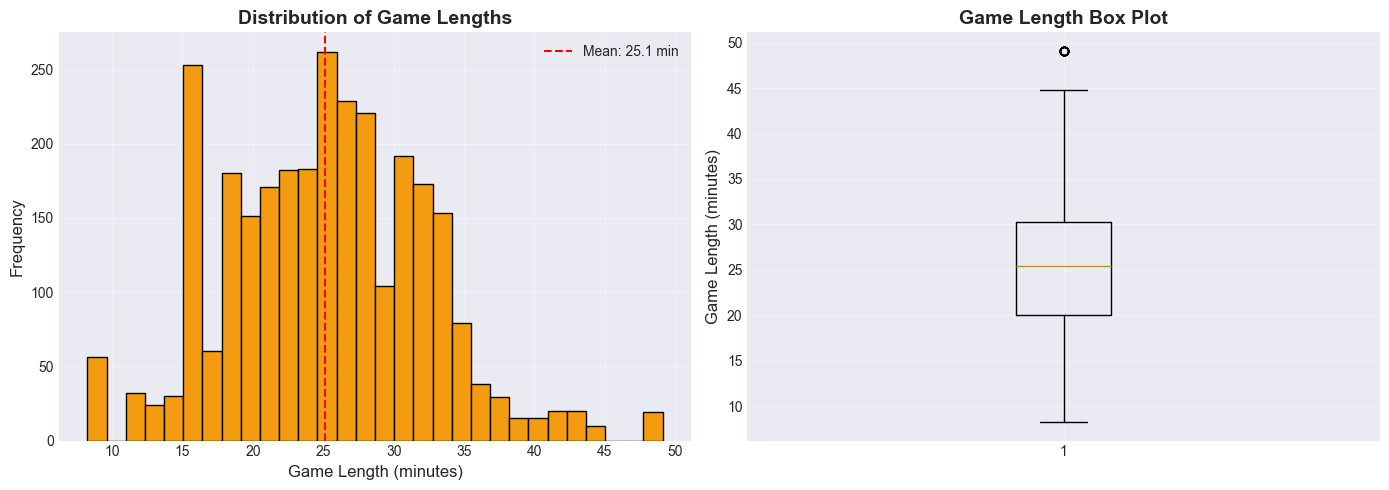

In [38]:
# Convert game length to minutes
def parse_game_length(length_str):
    """Convert game length string (e.g., '18m 0s') to minutes"""
    try:
        parts = length_str.replace('m', '').replace('s', '').split()
        minutes = int(parts[0])
        seconds = int(parts[1]) if len(parts) > 1 else 0
        return minutes + seconds / 60
    except:
        return np.nan

df['game_length_minutes'] = df['game_length'].apply(parse_game_length)

print("=== Game Length Statistics ===")
print(df['game_length_minutes'].describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['game_length_minutes'].dropna(), bins=30, color='#f39c12', edgecolor='black')
axes[0].set_xlabel('Game Length (minutes)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Game Lengths', fontsize=14, fontweight='bold')
axes[0].axvline(df['game_length_minutes'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["game_length_minutes"].mean():.1f} min')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['game_length_minutes'].dropna(), vert=True)
axes[1].set_ylabel('Game Length (minutes)', fontsize=12)
axes[1].set_title('Game Length Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Key Insights and Next Steps

In [39]:
print("="*60)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total matches: {len(df):,}")
print(f"   • Unique champions: {len(champion_counts)}")
print(f"   • Date range: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

print(f"\n⚖️ DATA BALANCE:")
print(f"   • Result distribution: {df['result'].value_counts().to_dict()}")
print(f"   • Balance ratio: {balance_ratio:.2f}")

print(f"\n🎮 CHAMPION META:")
print(f"   • Most picked: {champion_df.index[0]} ({champion_df.iloc[0]['Pick_Count']} picks)")
print(f"   • Average pick rate: {champion_df['Pick_Rate_%'].mean():.2f}%")
print(f"   • Champions with 10+ games: {len(champion_stats_filtered)}")

print(f"\n🏆 WIN RATES:")
print(f"   • Mean win rate: {champion_stats_filtered['Win_Rate_%'].mean():.2f}%")
print(f"   • Highest win rate champion: {champion_stats_filtered['Win_Rate_%'].idxmax()} "
      f"({champion_stats_filtered['Win_Rate_%'].max():.2f}%)")

print(f"\n⏱️ GAME DURATION:")
print(f"   • Average game length: {df['game_length_minutes'].mean():.1f} minutes")
print(f"   • Min/Max: {df['game_length_minutes'].min():.1f} / {df['game_length_minutes'].max():.1f} minutes")

print(f"\n🔍 DATA QUALITY:")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate rows: {df.duplicated().sum()}")
print(f"   • Data quality: {'✓ Excellent' if df.isnull().sum().sum() == 0 else '⚠ Needs cleaning'}")

print(f"\n📋 NEXT STEPS:")
print("   1. Feature engineering: Create champion synergy and counter features")
print("   2. Role detection: Identify champion positions (Top, Jungle, Mid, ADC, Support)")
print("   3. Encode champions: One-hot encoding or embedding approaches")
print("   4. Create train/test split")
print("   5. Build baseline models for champion recommendation")

print("\n" + "="*60)

KEY INSIGHTS FROM DATA EXPLORATION

📊 DATASET OVERVIEW:
   • Total matches: 2,901
   • Unique champions: 153
   • Date range: 67 days

⚖️ DATA BALANCE:
   • Result distribution: {'Defeat': 2271, 'Victory': 630}
   • Balance ratio: 0.28

🎮 CHAMPION META:
   • Most picked: Jhin (1144.0 picks)
   • Average pick rate: 0.65%
   • Champions with 10+ games: 146

🏆 WIN RATES:
   • Mean win rate: 50.63%
   • Highest win rate champion: Aurelion Sol (75.00%)

⏱️ GAME DURATION:
   • Average game length: 25.1 minutes
   • Min/Max: 8.2 / 49.1 minutes

🔍 DATA QUALITY:
   • Missing values: 0
   • Duplicate rows: 45
   • Data quality: ✓ Excellent

📋 NEXT STEPS:
   1. Feature engineering: Create champion synergy and counter features
   2. Role detection: Identify champion positions (Top, Jungle, Mid, ADC, Support)
   3. Encode champions: One-hot encoding or embedding approaches
   4. Create train/test split
   5. Build baseline models for champion recommendation



## 11. Save Processed Data

In [40]:
# Save champion statistics for later use
champion_stats.to_csv('../data/champion_statistics.csv')
print("Champion statistics saved to '../data/champion_statistics.csv'")

# Save enhanced dataframe
df.to_csv('../data/s11_processed.csv', index=False)
print("Enhanced dataset saved to '../data/s11_processed.csv'")

Champion statistics saved to '../data/champion_statistics.csv'
Enhanced dataset saved to '../data/s11_processed.csv'
